# 🌍 Chakwal Climate & Solar Trends


This notebook presents a comprehensive analysis of **NASA POWER climate data** for Chakwal, Pakistan over a 25-year period (2000-2024).


<center>
  <img src="Katas_Raj_Chakwal.jpg" alt="Katas Raj Chakwal" width="700"/>
  <br>
  <em>Figure — Katas Raj Chakwal: beautiful landscape of Chakwal region.</em>
</center>

---

# 🔎 Research Questions

This project investigates the climate of **Chakwal (2000–2024)** with a focus on temperature, rainfall, solar irradiance, and extreme weather events. The main research questions are:

1. **Temperature Trends** 
   - Are there signs of **more frequent extreme heat (heatwaves, >40°C days)** over time?  
   - Has the **average annual temperature** in Chakwal increased between 2000 and 2024?

2. **Overall Climate Change Signal**  
   - What do the combined trends in **temperature, rainfall, solar energy, and extreme weather** reveal about **climate change in Chakwal**?  
   - What are the **implications for agriculture, water resources, and renewable energy planning**?
                                 
3. **Climate Variability & Anomalies**  
   - How do **temperature anomalies (relative to a baseline)** highlight warming or cooling years?  
   - Do anomalies correspond with known extreme events (e.g., 2010 floods, 2020 heatwaves)?
  
4. **Solar Energy Potential**  
   - What is the trend of **solar irradiance** in Chakwal from 2000–2024?  
   - Is Chakwal becoming more or less suitable for **solar power generation**?  

5. **Rainfall & Extreme Weather** 
   - How has **annual and seasonal rainfall** changed during 2000–2024?  
   - Are there patterns of **more variability or extreme rainfall and wind events** in recent years?   

---

## 🧰 Tools & Technologies Used

- **Python Libraries**: `pandas`, `matplotlib`, `seaborn`, `plotly`
- **Database**: `SQLite` with `SQL` queries
- **Dataset**: [NASA POWER](https://power.larc.nasa.gov/) (2000-2024)

---


### 📦 Load Required Libraries  
We import the essential Python libraries for data manipulation, visualization, SQL integration, and regression analysis.

In [1]:
pip install pandas numpy matplotlib seaborn sqlalchemy statsmodels scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

### 🔗 Connect to SQLite Database  
We establish a connection to the local SQLite database that contains NASA POWER climate data for Chakwal.


In [15]:
engine = create_engine("sqlite:///chakwal_climate.db", echo=False)

### 📊 SQL Query 1: Annual Climate Summary  
This SQL query computes annual averages and totals for key climate indicators such as temperature, rainfall, and solar irradiance.


In [16]:
query1 = """
SELECT
    strftime('%Y', DATE) as year,
    AVG(T2M) AS mean_temp,
    MAX(T2M_MAX) AS max_temp,
    SUM(PRECTOTCORR) AS total_rain,
    AVG(ALLSKY_SFC_SW_DWN) AS solar_irradiance
FROM climate_data
GROUP BY year
ORDER BY year;
"""
result1 = pd.read_sql(query1, engine)

print("\n=== Annual Climate Summary ===")
print(result1)


=== Annual Climate Summary ===
    year  mean_temp  max_temp  total_rain  solar_irradiance
0   2000  24.970656     46.84      267.55          5.299262
1   2001  24.355726     46.17      488.97          5.348658
2   2002  25.009425     47.79      404.62          5.198849
3   2003  23.291425     47.65      718.92          5.154521
4   2004  24.780164     45.52      472.14          5.295464
5   2005  22.862219     48.26      737.71          5.102192
6   2006  23.124685     45.57     1071.99          5.120192
7   2007  22.771753     48.97     1038.91          5.185068
8   2008  23.151721     42.90      876.96          5.087568
9   2009  23.920712     47.74      505.51          5.285534
10  2010  23.755315     47.15      846.58          5.143836
11  2011  23.188658     45.76      750.17          5.084493
12  2012  22.641475     46.76      684.38          5.148689
13  2013  22.724247     46.28      808.20          5.104274
14  2014  22.718027     46.03      770.08          5.086548
15  2015

### 🔥 SQL Query 2: Identify the Hottest Year  
We identify the year with the highest average temperature from the dataset.


In [17]:
query2 = """
SELECT strftime('%Y', DATE) as year, AVG(T2M) as avg_temp
FROM climate_data
GROUP BY year
ORDER BY avg_temp DESC
LIMIT 1;
"""
result2 = pd.read_sql(query2, engine)
print("\n🔥 Hottest Year:")
print(result2)


🔥 Hottest Year:
   year   avg_temp
0  2002  25.009425


### 🌧️ SQL Query 3: High Rainfall Years  
This query returns years where total annual rainfall exceeded 1000 mm.


In [18]:
query3 = """
SELECT strftime('%Y', DATE) as year, SUM(PRECTOTCORR) as total_rain
FROM climate_data
GROUP BY year
HAVING total_rain > 1000
ORDER BY total_rain DESC;
"""
result3 = pd.read_sql(query3, engine)
print("\n🌧️ Years with Rainfall > 1000 mm:")
print(result3)


🌧️ Years with Rainfall > 1000 mm:
   year  total_rain
0  2020     2318.10
1  2022     1478.74
2  2024     1353.58
3  2021     1199.05
4  2023     1166.60
5  2006     1071.99
6  2007     1038.91


### ☀️ SQL Query 4: Monthly Solar Irradiance  
We calculate the average solar irradiance for each month across all years.


In [19]:
query4 = """
SELECT strftime('%m', DATE) as month, AVG(ALLSKY_SFC_SW_DWN) as avg_solar
FROM climate_data
GROUP BY month
ORDER BY month;
"""
result4 = pd.read_sql(query4, engine)
print("\n☀️ Average Solar Irradiance by Month:")
print(result4)


☀️ Average Solar Irradiance by Month:
   month  avg_solar
0     01   3.034697
1     02   3.917592
2     03   5.134181
3     04   6.304333
4     05   7.138333
5     06   7.149573
6     07   6.011445
7     08   5.673394
8     09   5.494747
9     10   4.808516
10    11   3.624733
11    12   3.072158


### 🔥 SQL Query 5: Count of Heatwave Days  
This query counts how many days per year had maximum temperature exceeding 40°C, indicating heatwaves.


In [43]:
query = """
WITH years AS (
    SELECT DISTINCT strftime('%Y', DATE) AS year FROM climate_data
)
SELECT y.year,
       COALESCE(h.heatwave_days, 0) AS heatwave_days
FROM years y
LEFT JOIN (
    SELECT strftime('%Y', DATE) AS year, COUNT(*) AS heatwave_days
    FROM climate_data
    WHERE T2M_MAX > 40
    GROUP BY year
) h USING (year)
ORDER BY y.year;
"""

df_heatwave = pd.read_sql_query(query, engine)
df_heatwave

,year,heatwave_days
0,2000,126
1,2001,44
2,2002,100
3,2003,47
4,2004,66
5,2005,31
6,2006,47
7,2007,22
8,2008,25
9,2009,60


# Plotting from SQL Results

In [21]:
sns.set_context("talk")
plt.style.use("ggplot")

### 🔎 Research Question 1: Temperature Trends
- Are there signs of **more frequent extreme heat (heatwaves, >40°C days)** over time?

### 📈 Plot: Annual Heatwave Days  
We visualize how the number of heatwave days has changed over time.


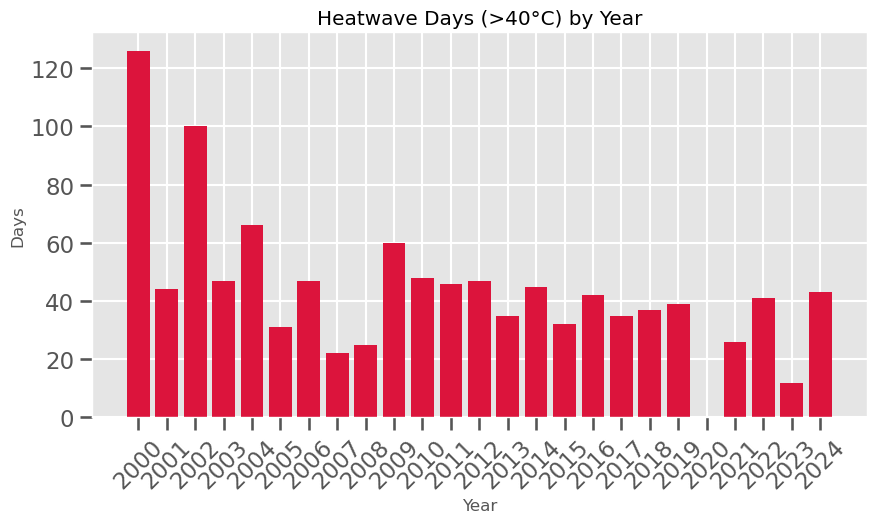

In [45]:
plt.figure(figsize=(10,5))
plt.bar(df_heatwave["year"], df_heatwave["heatwave_days"], color="crimson")
plt.title("Heatwave Days (>40°C) by Year")
plt.xlabel("Year")
plt.ylabel("Days")
plt.xticks(rotation=45)
plt.show()

In [ ]:
- Has the **average annual temperature** in Chakwal increased between 2000 and 2024?

### 🌡️ Plot: Average Annual Temperature  
This plot shows the trend of average annual temperature in Chakwal.


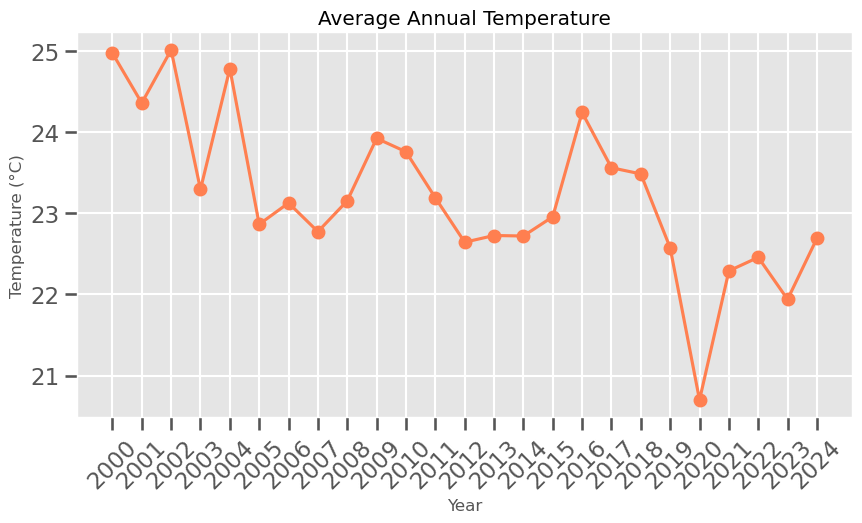

In [23]:
plt.figure(figsize=(10,5))
plt.plot(result1["year"], result1["mean_temp"], marker='o', color='coral')
plt.title("Average Annual Temperature")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.xticks(rotation=45)  # rotate labels 45° for readability
plt.show()

### 🔎 Research Question 2: Overall Climate Change Signal  
   - What do the combined trends in **temperature, rainfall, solar energy, and extreme weather** reveal about **climate change in Chakwal**?   

### 📉 Plotting Trendlines for Key Indicators  
We use linear regression to plot trendlines for temperature, rainfall, and solar irradiance to visualize long-term changes.


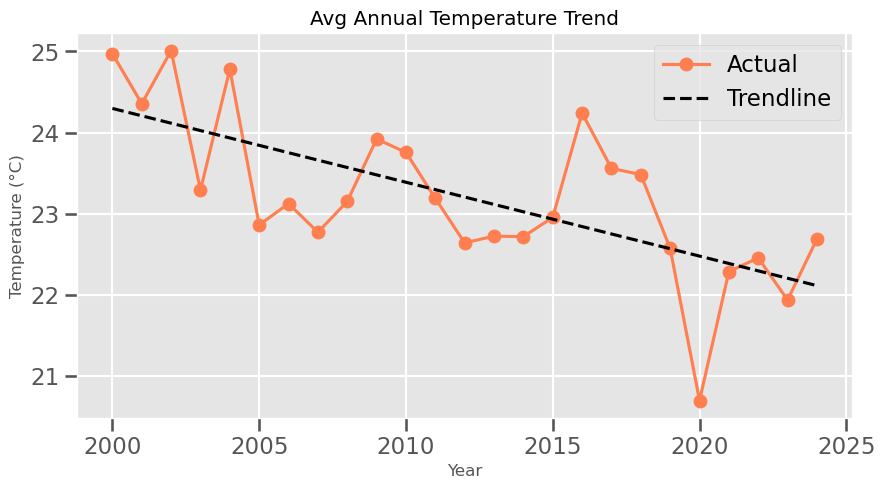


=== Regression summary for Avg Annual Temperature Trend ===
                            OLS Regression Results                            
Dep. Variable:              mean_temp   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     19.56
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           0.000196
Time:                        10:18:24   Log-Likelihood:                -26.949
No. Observations:                  25   AIC:                             57.90
Df Residuals:                      23   BIC:                             60.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

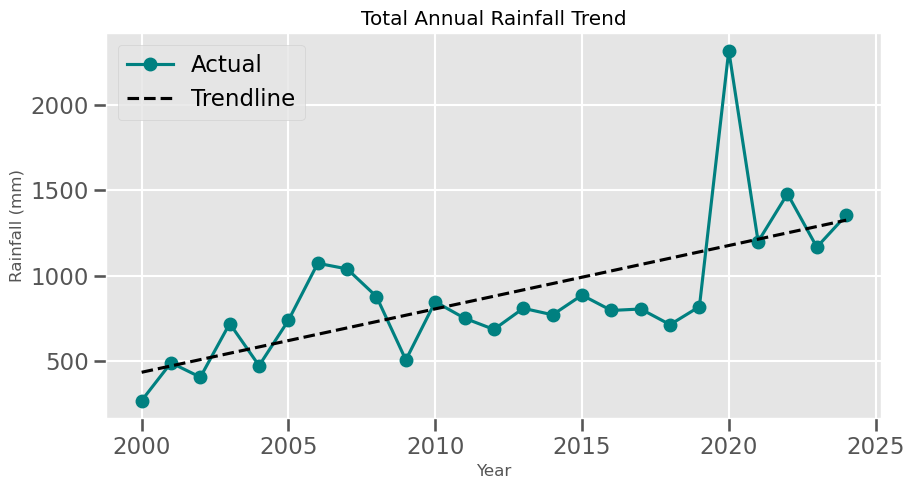


=== Regression summary for Total Annual Rainfall Trend ===
                            OLS Regression Results                            
Dep. Variable:             total_rain   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     17.69
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           0.000337
Time:                        10:18:24   Log-Likelihood:                -178.50
No. Observations:                  25   AIC:                             361.0
Df Residuals:                      23   BIC:                             363.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

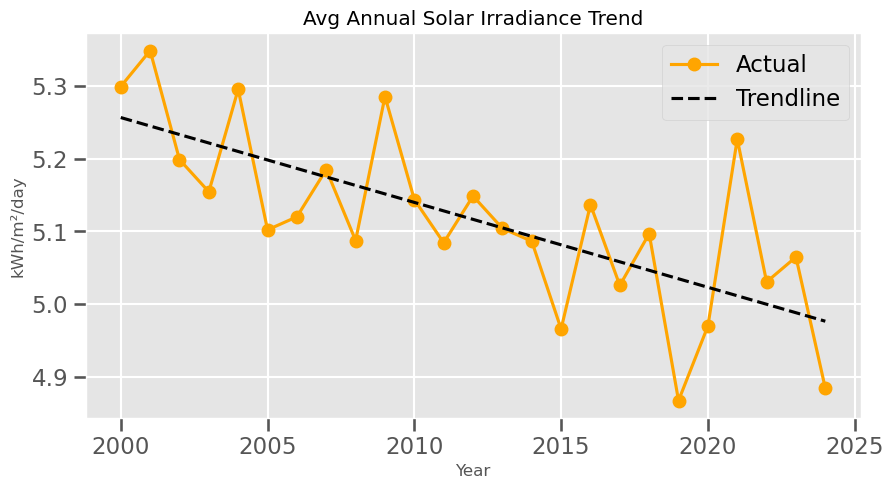


=== Regression summary for Avg Annual Solar Irradiance Trend ===
                            OLS Regression Results                            
Dep. Variable:       solar_irradiance   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     22.60
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           8.59e-05
Time:                        10:18:24   Log-Likelihood:                 26.193
No. Observations:                  25   AIC:                            -48.39
Df Residuals:                      23   BIC:                            -45.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [24]:
def plot_trend(x_values, y_values, title, ylabel, color):
    x = x_values.values.reshape(-1, 1).astype(float)
    y = y_values.values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)

    plt.figure(figsize=(10,5))
    plt.plot(x_values, y_values, marker='o', color=color, label='Actual')
    plt.plot(x_values, y_pred.flatten(), linestyle='--', color='black', label='Trendline')
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

    X = sm.add_constant(x_values.astype(int))
    ols_model = sm.OLS(y_values, X).fit()
    print(f"\n=== Regression summary for {title} ===")
    print(ols_model.summary())
    
plot_trend(result1["year"].astype(int), result1["mean_temp"],
           "Avg Annual Temperature Trend", "Temperature (°C)", "coral")

plot_trend(result1["year"].astype(int), result1["total_rain"],
           "Total Annual Rainfall Trend", "Rainfall (mm)", "teal")

plot_trend(result1["year"].astype(int), result1["solar_irradiance"],
           "Avg Annual Solar Irradiance Trend", "kWh/m²/day", "orange")

### 🔎 Research Question 3: Climate Variability & Anomalies
   - How do **temperature anomalies (relative to a baseline)** highlight warming or cooling years?  
   - Do anomalies correspond with known extreme events (e.g., 2010 floods, 2020 heatwaves)?  

### 🌍 Temperature Anomalies Analysis  
We compute temperature anomalies compared to a 2000–2010 baseline to study climate change patterns.


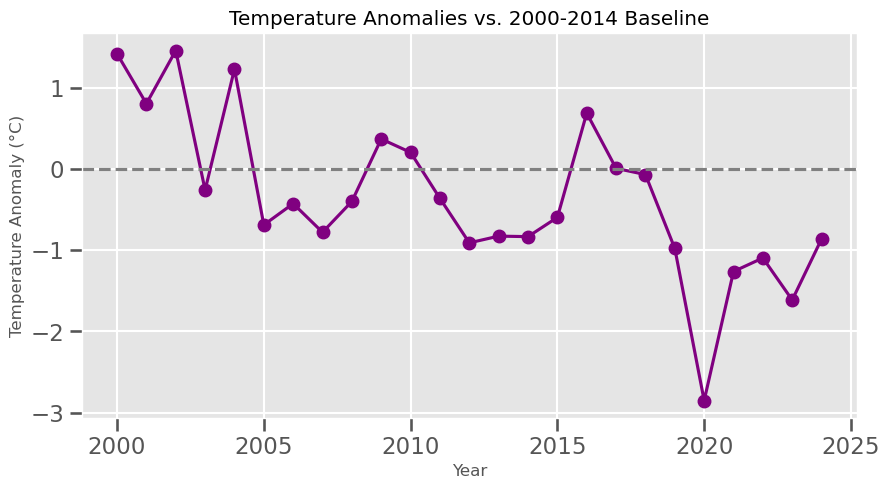

In [25]:
temp_annual = result1.copy()
temp_annual.index = pd.to_datetime(temp_annual["year"] + "-12-31")

baseline_period = temp_annual.loc[(temp_annual.index.year >= 2000) & (temp_annual.index.year <= 2014)]
baseline_mean = baseline_period["mean_temp"].mean()

anomalies = temp_annual["mean_temp"] - baseline_mean

plt.figure(figsize=(10,5))
plt.plot(temp_annual.index.year, anomalies, marker='o', color='purple')
plt.axhline(0, linestyle='--', color='gray')
plt.title("Temperature Anomalies vs. 2000-2014 Baseline")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(True)
plt.show()

### 🧱 Load Entire Dataset for Heatmaps  
We fetch the full dataset from SQLite to prepare it for heatmap visualization.


In [31]:
query_full = "SELECT * FROM climate_data;"
df = pd.read_sql(query_full, engine, parse_dates=["DATE"])
df.set_index("DATE", inplace=True)

### 🔎 Research Question 4: Solar Energy Potential
- What is the trend of **solar irradiance** in Chakwal from 2000–2024?  
- Is Chakwal becoming more or less suitable for **solar power generation**?  

### ☀️ Monthly Solar Irradiance Heatmap  
This heatmap visualizes monthly solar energy potential over the years.


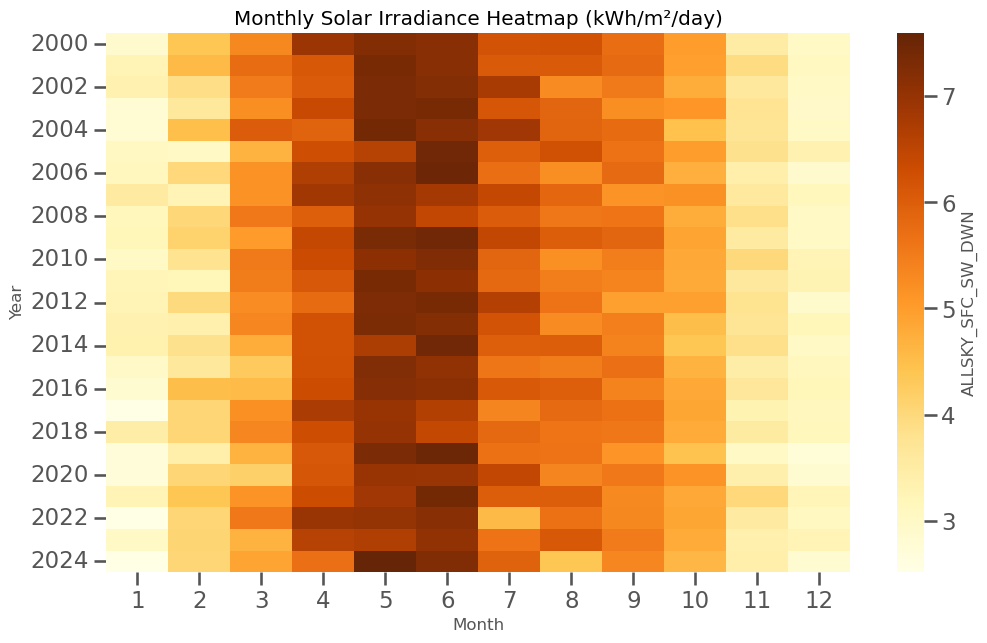

In [38]:
def plot_heatmap(df, column, title, cmap, aggfunc="mean"):
    pivot = df.pivot_table(index="year", columns="month", values=column, aggfunc=aggfunc)
    plt.figure(figsize=(12, 7))
    sns.heatmap(pivot, cmap=cmap, cbar_kws={'label': column})
    plt.title(title)
    plt.xlabel("Month")
    plt.ylabel("Year")
    plt.show()
plot_heatmap(df, "ALLSKY_SFC_SW_DWN", "Monthly Solar Irradiance Heatmap (kWh/m²/day)", "YlOrBr")

### 🔎 Research Question 5: Rainfall & Extreme Weather 
   - How has **annual and seasonal rainfall** changed during 2000–2024?  

### 🌧️ Monthly Rainfall Heatmap  
A heatmap showing the variation of rainfall across months and years.

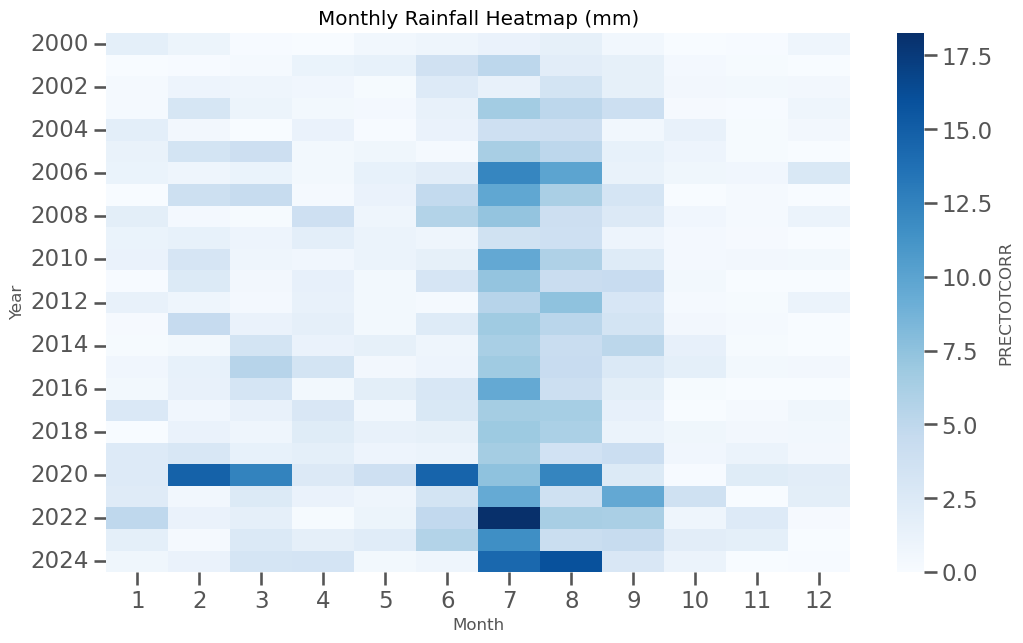

In [39]:
plot_heatmap(df, "PRECTOTCORR", "Monthly Rainfall Heatmap (mm)", "Blues")

- Are there patterns of **more variability or extreme rainfall and wind events** in recent years? 

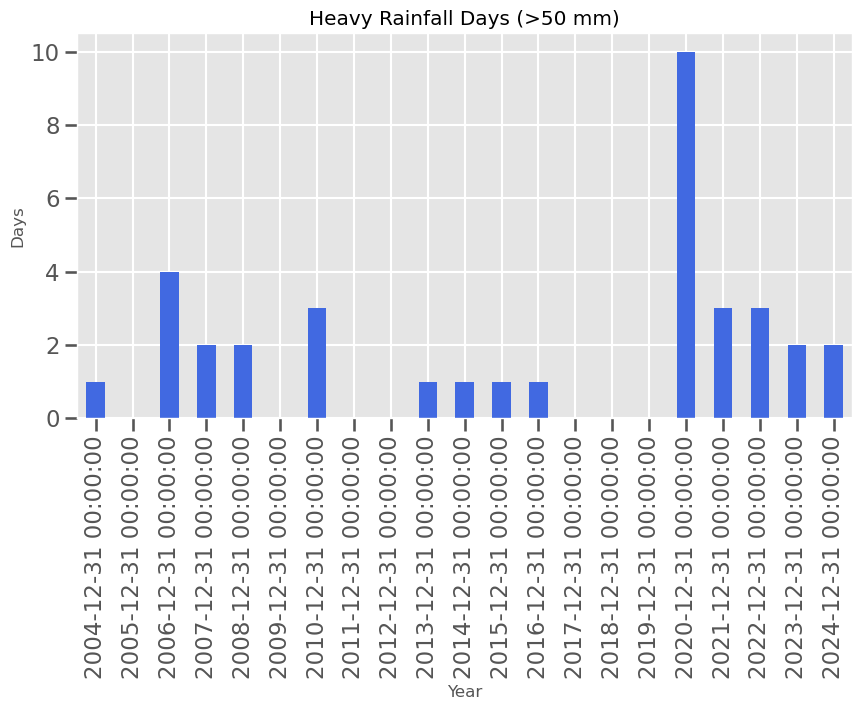

In [40]:
heavy_rain = df[df["PRECTOTCORR"] > 50]
heavy_rain_count = heavy_rain.resample("YE").size()
plt.figure(figsize=(10,5))
heavy_rain_count.plot(kind="bar", color="royalblue")
plt.title("Heavy Rainfall Days (>50 mm)")
plt.ylabel("Days")
plt.xlabel("Year")
plt.show()

We visualize the maximum wind speed recorded each year in Chakwal.

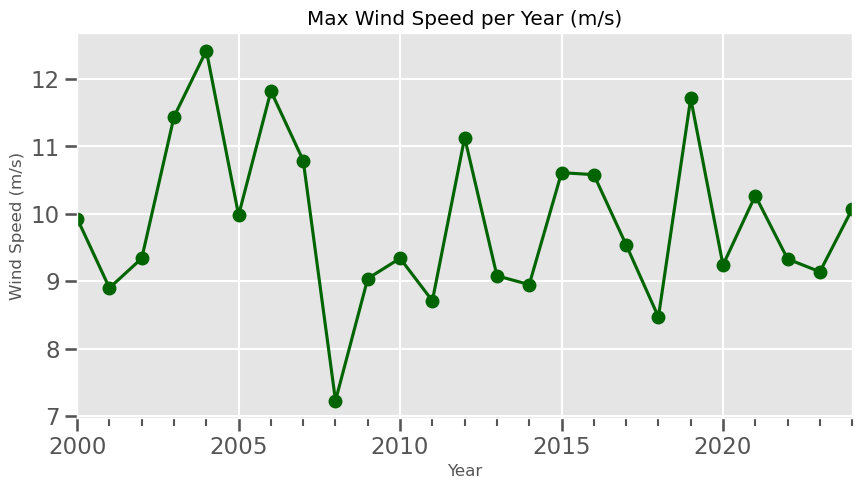

In [41]:
wind_max = df["WS10M_MAX"].resample("YE").max()

plt.figure(figsize=(10,5))
wind_max.plot(marker='o', color="darkgreen")
plt.title("Max Wind Speed per Year (m/s)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Year")
plt.show()

## 📇 About the Author  


Written by **[Aleeza Zia](https://www.linkedin.com/in/aleeza-zia27)** · IBM Data Science Professional · Google Certified Data Analytics & Advanced Data Analytics Professional  

<center style="color:gray; font-size:20px;">
  🤞 <b>Good Luck!</b>
</center>